# Auswertung - Verteilung der Daten

In diesem ersten Abschnitt soll die Verteilung, der bei der Evaluierung vom 12.6 - 14.6 erhobenen Daten, festgestellt werden. Dabei ist einersteits interessant wie viele Datenpunkte pro Person, Area of Interest (AOI) bzw. pro Position erhoben wurden. Dieses erste Teil der Auswertung soll daher einen ersten Überblick über die erobenen Daten gewähren und zusätzlich Indiezien darüber liefern, welche erste Limitationen für das, der Evaluation zu grundelegende, System erkannt werden können.

### Auswertungs-Fragen:
* [Frage 1: Gesamtzahl der gesammelten Daten](#cell1)
* [Frage 2: Verhältnis von “Erkannt” und “Nicht-Erkannt”](#cell2)
* [Frage 3: Verteilung der Hits auf die einzelnen AOIs](#cell3)
* [Frage 4: Verteilung der Hits auf die einzelnen Positionen](#cell4)
* [Frage 5: Verteilung der Hits auf die AOIs pro Position](#cell5)
* [Frage 6: Verteilung der Hits auf die Clients](#cell6)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import math

from datetime import datetime

In [21]:
root = '../0_annotation/test'
file_names = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        if 'annotation' not in file or '.csv' not in file:
            continue
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))

<a id="cell1"></a>
# Frage 1: Gesamtzahl der gesammelten Daten

**Ziel:** WAS IST DAS ZIEL.

In [62]:
info_titles = [
    'Frames',
    'Zeitpunkt',
    'Test Person',
    'Frames mit Gesicht',
    'Frames mit Blick',
    'Dateipfad'
]

# Important vars for further analysis

info_data = []
counter_gaze = []
frames_with_face = []
testers = []
aoi_hits = []
position_hits = {}
positions_by_aoi_hits = []
client_data = {}

for f in file_names:
    df = pd.read_csv(f, sep=',', engine='python')
    
    # meta data
    count_total = len(df['frame'])
    last_ts = datetime.fromtimestamp(df['server_timestamp'][count_total - 1])
    test_person = str((df['annotation_test_person_id'][count_total - 1]))[:-1]
       
    
    # gaze & face hits
    count_face = len(df[(df[['eye_lmk_X_0','eye_lmk_Y_0','eye_lmk_Z_0']] != 0).all(axis=1)]['frame'])
    count_gaze = len(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['frame'])
    
    # aoi & positions hits
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['annotation_aoi'],
                                         return_counts=True)
                 
    current_aois = pd.DataFrame(occurCount, index =uniqueValues, columns=["tester_" + test_person]) 
    
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['annotation_pos'],
                                         return_counts=True)
    current_positions = occurCount
    
    # aoi vs. positions hits
    tempFrame = df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]
    result_pos_aoi = tempFrame.groupby(['annotation_pos','annotation_aoi']).size().reset_index().rename(columns={0:"tester_" + test_person})
        
    #client
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['client_id'],
                                         return_counts=True)
    client_hits = occurCount
    
    # extract data separately
    info_data.append([count_total, last_ts, test_person, count_face, count_gaze, f])
    counter_gaze.append(count_gaze)
    frames_with_face.append(count_face)    
    positions_by_aoi_hits.append(result_pos_aoi)
    
    aoi_hits.append(current_aois)
    position_hits['tester_' + test_person] = current_positions
    client_data['tester_' + test_person] = client_hits
    
    testers.append(test_person)

aoi_hits = pd.concat(aoi_hits, axis=1)
print(positions_by_aoi_hits)
pd.DataFrame(info_data, columns=info_titles)

[    annotation_pos  annotation_aoi  tester_39
0                1               1          1
1                1               9          1
2                1              17          1
3                1              20          4
4                2               1          2
5                2               3          2
6                2               4          5
7                2               5          1
8                2               6          1
9                2               7          1
10               2              10          1
11               2              13          2
12               2              19          2
13               2              20          1
14               2              21          1
15               2              23          2
16               2              24          1
17               3              25          1
18               4               3          1
19               4               4          8
20               4               

,Frames,Zeitpunkt,Test Person,Frames mit Gesicht,Frames mit Blick,Dateipfad
0,16917,2019-06-14 09:42:21,39,16917,77,../0_annotation/test/39__annotation_2019_06_14...
1,15400,2019-06-13 15:23:06,37,15400,332,../0_annotation/test/37__annotation_2019_06_13...


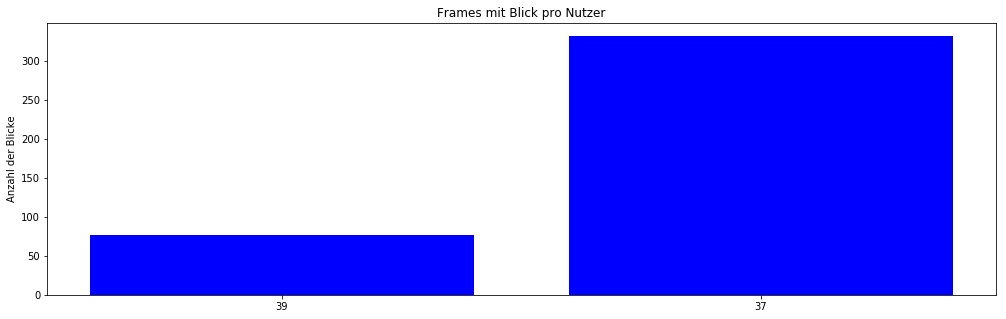

In [23]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.xticks(y_pos, testers)
plt.ylabel('Anzahl der Blicke')
plt.title('Frames mit Blick pro Nutzer')

plt.show()

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell2"></a>

# Frage 2: Verhältnis von “Erkannt” und “Nicht-Erkannt”

**Ziel:** WAS IST DAS ZIEL.

Frames mit Gesicht: 755828
Frames mit Blick: 17232
Verhältnis zwischen Gesicht (97.77%) und Blick(2.23%)


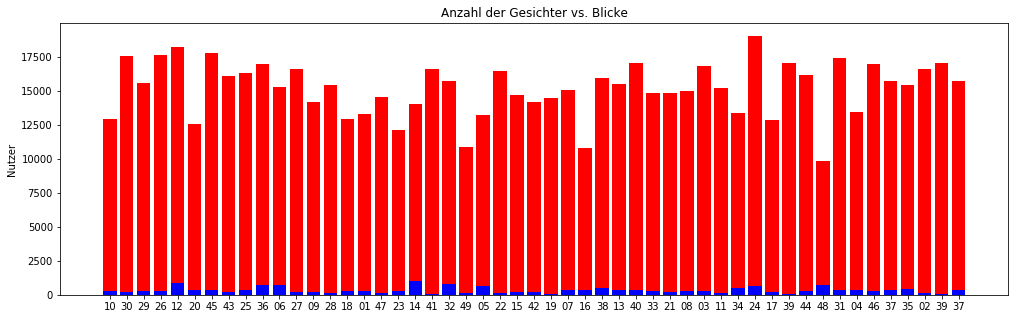

In [5]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.bar(y_pos, frames_with_face, align='center', color = 'r', bottom = counter_gaze)
plt.xticks(y_pos, testers)
plt.ylabel('Nutzer')
plt.title('Anzahl der Gesichter vs. Blicke')

sum_face = np.sum(frames_with_face)
sum_gaze = np.sum(counter_gaze)

percent_face = str(round(sum_face / ((sum_face + sum_gaze)/100), 2))
percent_gaze = str(round(sum_gaze / ((sum_face + sum_gaze)/100), 2))


print("Frames mit Gesicht: " + str(sum_face))
print("Frames mit Blick: " + str(sum_gaze))
print("Verhältnis zwischen Gesicht (" + percent_face + "%) und Blick(" + percent_gaze + "%)")

plt.show()

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell3"></a>
# Frage 3: Verteilung der Hits auf die einzelnen AOIs 

**Ziel:** WAS IST DAS ZIEL.

## Verteilung der Hits auf AOIs - gesamt

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'AOIs')

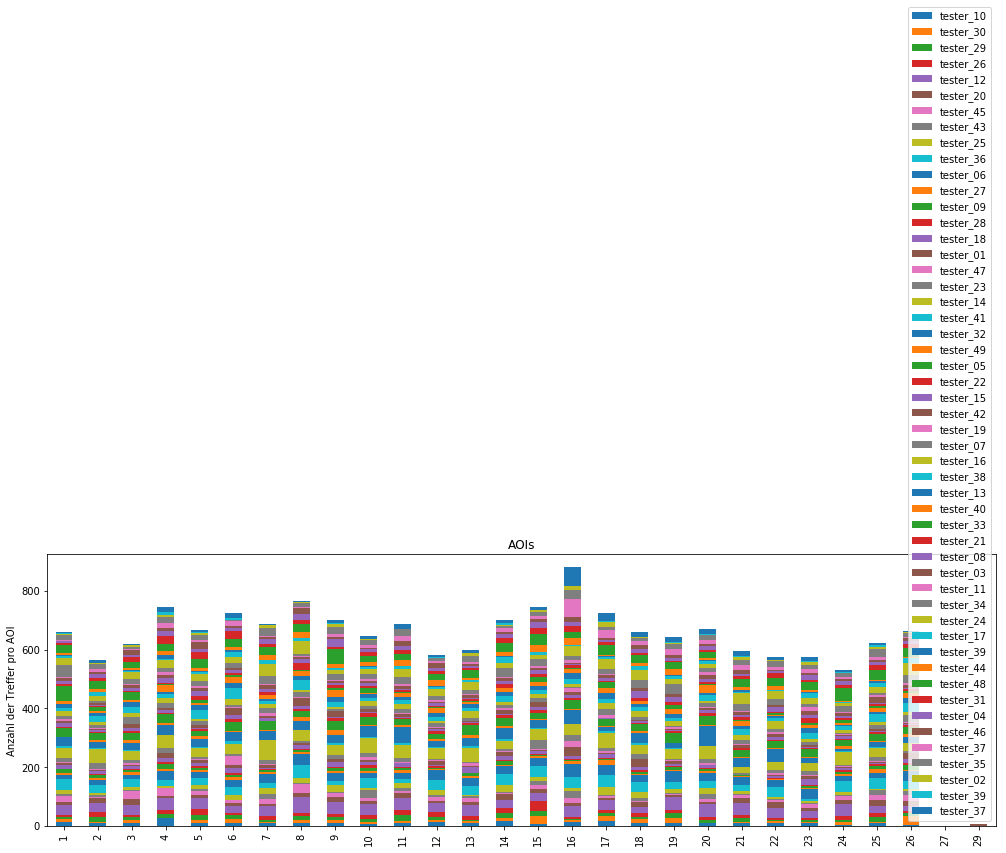

In [7]:
y_pos = np.arange(len(aoi_hits))

aoi_hits.plot(kind='bar', stacked=True)
    
plt.ylabel('Anzahl der Treffer pro AOI')
plt.title('AOIs')

**Ergebnis:** WAS IST DAS Ergebnis.

## Verteilung der Hits  auf AOIs - pro Nutzer

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'Nutzer')

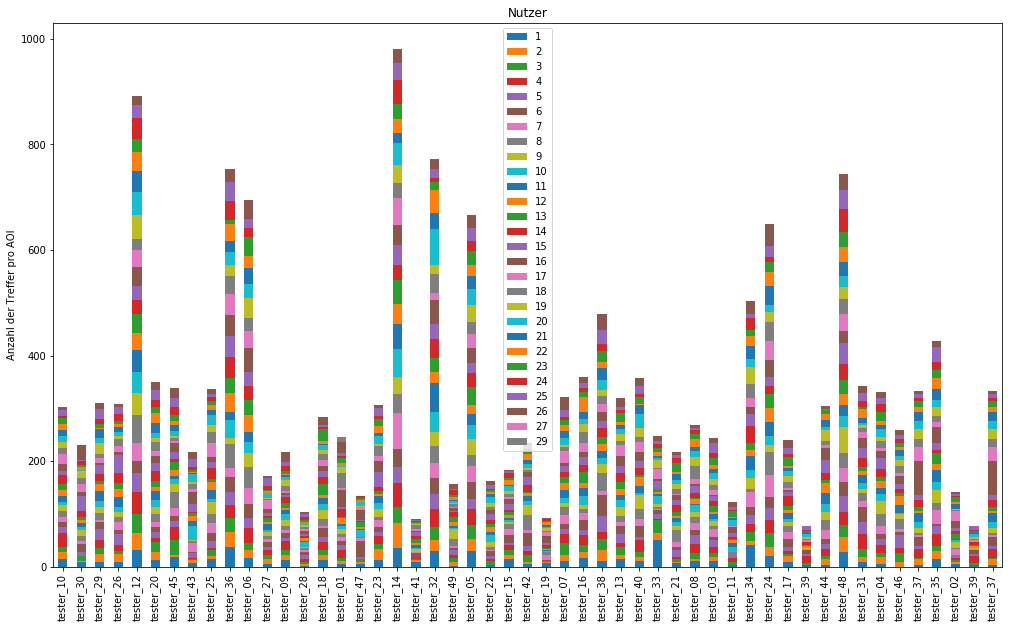

In [8]:
plt.rcParams["figure.figsize"] = (17, 10) # (w, h)

aoi_hits.transpose().plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro AOI')
plt.title('Nutzer')

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell4"></a>
# Frage 4: Verteilung der Hits auf die einzelnen Positionen

**Ziel:** WAS IST DAS ZIEL.

## Verteilung der Hits auf Positionen - gesamt

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'AOIs')

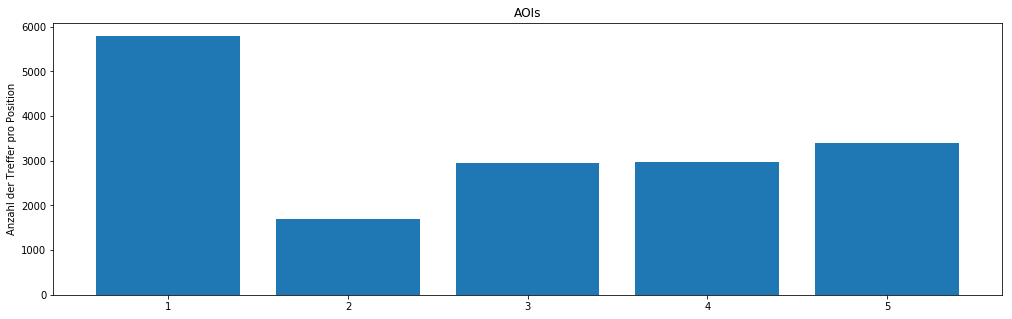

In [9]:
y_pos = np.arange(len(position_hits['tester_37']))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)
plt.bar(y_pos+1, sum(position_hits[key] for key in position_hits), align='center')

plt.ylabel('Anzahl der Treffer pro Position')
plt.title('AOIs')

**Ergebnis:** WAS IST DAS Ergebnis.

## Verteilung der Hits auf Positionen - pro Nutzer

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'Nutzer')

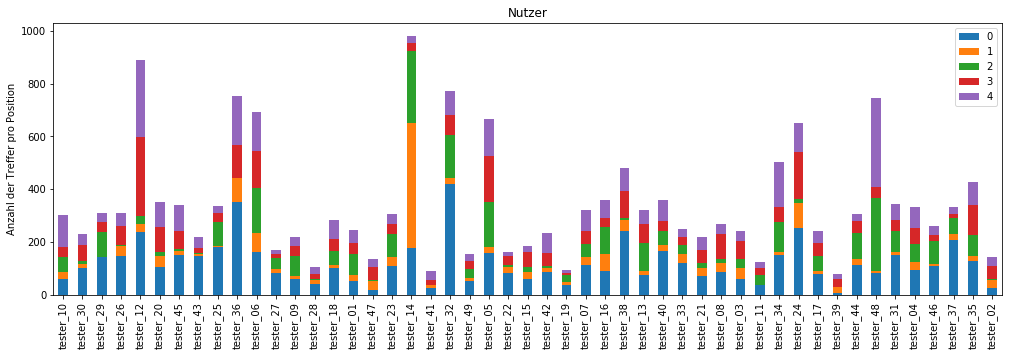

In [10]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

df=pd.DataFrame(position_hits).transpose()
df.plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro Position')
plt.title('Nutzer')

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell5"></a>
# Frage 5: Verteilung der Hits auf die AOIs pro Position

**Ziel:** WAS IST DAS ZIEL.

## Position 1:

    annotation_pos  annotation_aoi  tester_39
0                1               1          1
1                1               9          1
2                1              17          1
3                1              20          4
4                2               1          2
5                2               3          2
6                2               4          5
7                2               5          1
8                2               6          1
9                2               7          1
10               2              10          1
11               2              13          2
12               2              19          2
13               2              20          1
14               2              21          1
15               2              23          2
16               2              24          1
17               3              25          1
18               4               3          1
19               4               4          8
20               4               5

Text(0.5, 1.0, 'AOI Verteilung')

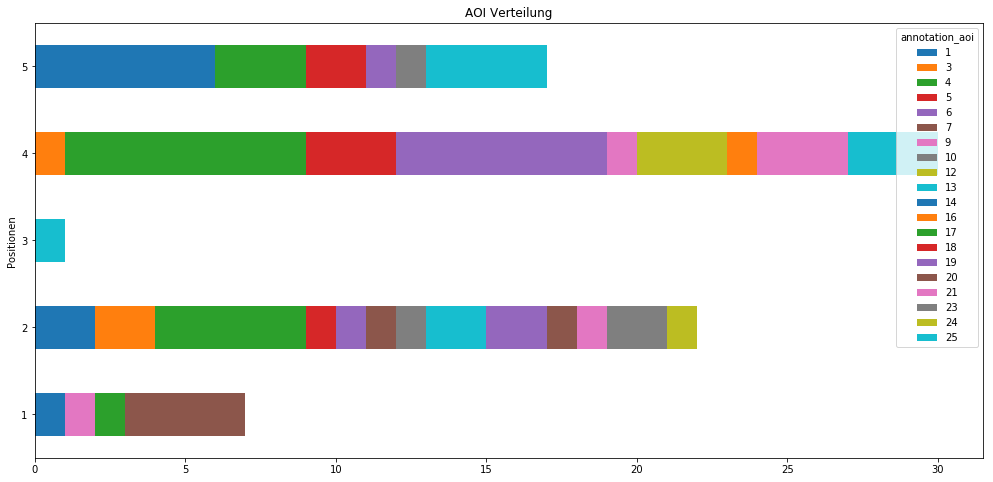

In [66]:
plt.rcParams["figure.figsize"] = (17, 8) # (w, h)
print(positions_by_aoi_hits[0])
post_aoi_df = positions_by_aoi_hits[0].pivot(index=positions_by_aoi_hits[0]['annotation_pos'], columns='annotation_aoi')['tester_39']
post_aoi_df.plot.barh(stacked=True);

plt.ylabel('Positionen')
plt.title('AOI Verteilung')

annotation_aoi   1    2    3    4    5    6    7    8    9    10  ...    17  \
annotation_pos                                                    ...         
1               NaN  NaN  NaN  8.0  3.0  2.0  3.0  NaN  2.0  1.0  ...   5.0   
2               3.0  NaN  1.0  8.0  1.0  NaN  NaN  NaN  2.0  1.0  ...   NaN   
3               5.0  5.0  1.0  9.0  1.0  1.0  2.0  4.0  NaN  1.0  ...   3.0   
4               3.0  3.0  3.0  1.0  2.0  NaN  NaN  1.0  NaN  3.0  ...   NaN   
5               4.0  4.0  5.0  NaN  5.0  7.0  5.0  5.0  7.0  1.0  ...  10.0   

annotation_aoi   18   19   20   21   22   23   24   25   26  
annotation_pos                                               
1               1.0  4.0  2.0  3.0  3.0  1.0  NaN  1.0  3.0  
2               1.0  NaN  NaN  1.0  1.0  NaN  NaN  4.0  1.0  
3               3.0  2.0  2.0  1.0  1.0  1.0  1.0  2.0  1.0  
4               1.0  1.0  2.0  2.0  1.0  2.0  1.0  NaN  NaN  
5               5.0  5.0  5.0  5.0  6.0  6.0  2.0  5.0  NaN  

[5 rows x 2

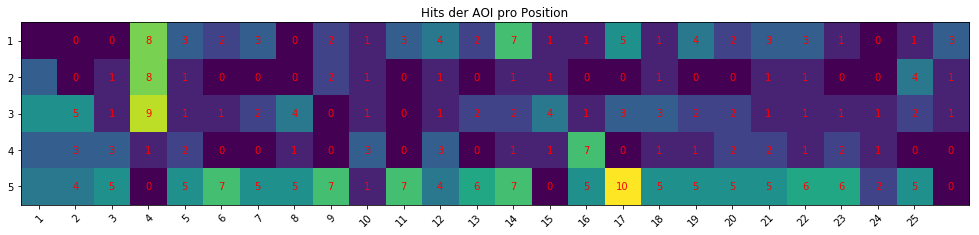

In [57]:
positions = [1,2,3,4,5]
aois = range(1, 26)

print(post_aoi_df)

harvest = np.nan_to_num(post_aoi_df.values)

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(aois)))
ax.set_yticks(np.arange(len(positions)))

# ... and label them with the respective list entries

ax.set_xticklabels(aois)
ax.set_yticklabels(positions)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for num in [0,1,2,3,4]:
    for j in aois:
        text = ax.text(j, num, str(int(harvest[num][j])), ha="center", va="center", color="r")

ax.set_title("Hits der AOI pro Position")
# Add colorbar, make sure to specify tick locations to match desired ticklabels
#cbar = fig.colorbar(im, ticks=[-1, 0, 14])
#cbar.ax.set_yticklabels(['< -1', '0', '> 14']) 

plt.show()

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell6"></a>
# Frage 6: Verteilung der Hits auf die Clients

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'Nutzer')

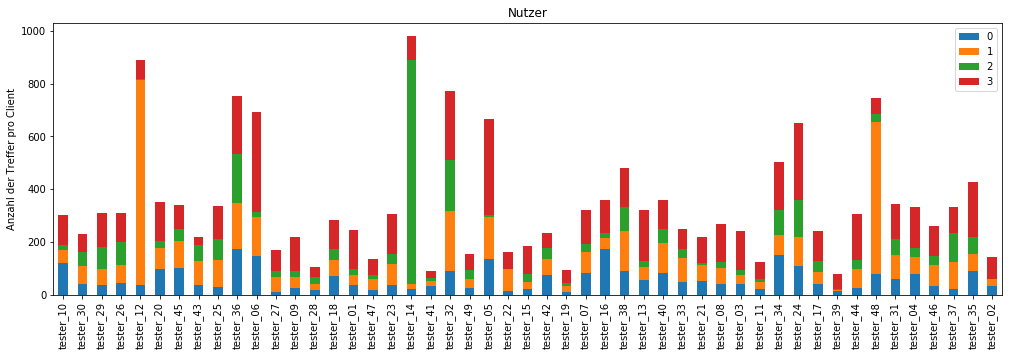

In [15]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

df=pd.DataFrame(client_data).transpose()
df.plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro Client')
plt.title('Nutzer')

**Ergebnis:** WAS IST DAS Ergebnis.